# Thinking probabilistically-- Continuous variables

## Probability density functions

PMF is the continuous analog to the probability mass function, the PMF. It describes the chances of observing a value of a continuous variable. Areas under the PDFs give probabilities.

### Introduction to the Normal distribution

The Normal distribution is parametrized by two parameters. The mean determines where the center of the peak is. The standard deviation is a measure of how wide the peak is, or how spread out the data are. 

Mean and standart deviation are the names of the parameters of the normal distribution.

Compare ECDF of the data to the theoretical CDF of the normal distribution. And see if the data are approximately normally distributed.

### The Normal PDF

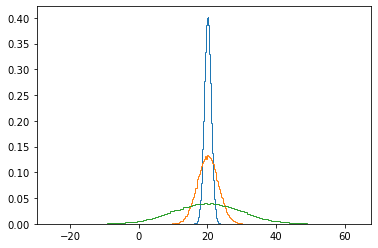

In [100]:
import numpy as np
import matplotlib.pyplot as plt
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

plt.hist(samples_std1, density=True, histtype="step", bins=100)
plt.hist(samples_std3, density=True, histtype="step", bins=100)
plt.hist(samples_std10, density=True, histtype="step", bins=100)
plt.show()

### The Normal CDF

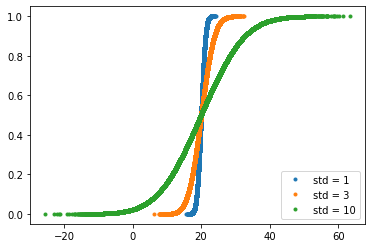

In [101]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

_ = plt.plot(x_std1, y_std1, marker=".", linestyle="none")
_ = plt.plot(x_std3, y_std3, marker=".", linestyle="none")
_ = plt.plot(x_std10, y_std10, marker=".", linestyle="none")
_ = plt.legend(["std = 1", "std = 3", "std = 10"], loc="lower right")
plt.show()

The width of the CDF varies with the standard deviation.

## The Normal distribution: Properties and warnings

### Are the Belmont Stakes results Normally distributed?


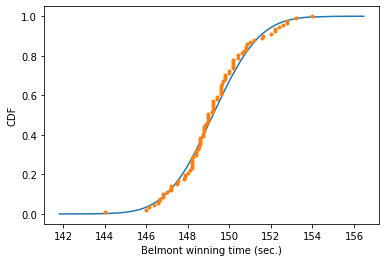

In [73]:
from urllib.request import urlretrieve 
import pandas as pd
url = "https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv"
urlretrieve(url, "belmont.csv")

belmont = pd.read_csv("belmont.csv", parse_dates=["Time"])
belmont
time = (belmont["Time"].dt.hour * 60 + belmont["Time"].dt.minute + belmont["Time"].dt.second / 60)
belmont_no_outliers = np.array(time.round(2))

mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
samples = np.random.normal(mu, sigma, 100000)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = ".", linestyle="none")
_ = plt.xlabel("Belmont winning time (sec.)")
_ = plt.ylabel("CDF")
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### What are the chances of a horse matching or beating Secretariat's record?

In [95]:
samples = np.random.normal(149.22101123595507, 1.627816471774816, 1000000)
prob = np.sum(samples <= 144) / len(samples)
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000693


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. 

## The Exponential distribution

Amount of time between events is Exponentially distributed. It has a single parameter: mean of the time. 

Exponential and normal are just two of many examples of continuous distributions. To get the CDF, stories are simulated

### If you have a story, you can simulate it!


In [96]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

### Distribution of no-hitters and cycles

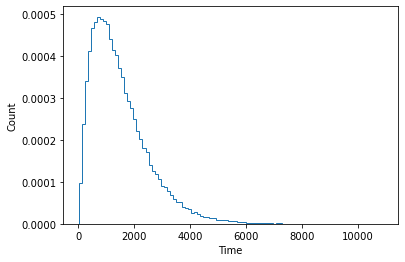

In [97]:
waiting_times = successive_poisson(764, 715, size=100000)
plt.hist(waiting_times, bins=100, density=True, histtype="step")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process.

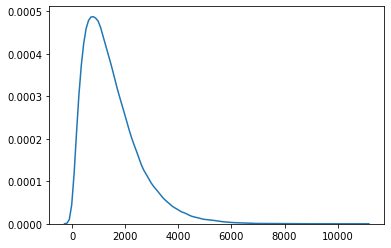

In [104]:
import seaborn as sns
sns.kdeplot(waiting_times)